In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [456]:
data = pd.read_csv('C://Users//ksury//Desktop//ec lrs//audi.csv')
data.head()

,year,mileage,tax,mpg,engineSize,price
0,2017,15735,150,55.4,1.4,12500
1,2016,36203,20,64.2,2.0,16500
2,2016,29946,30,55.4,1.4,11000
3,2017,25952,145,67.3,2.0,16800
4,2019,1998,145,49.6,1.0,17300


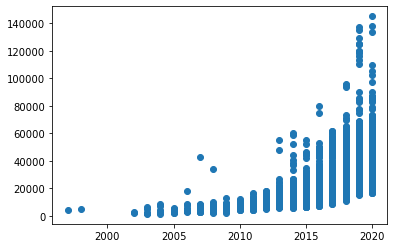

In [457]:
plt.scatter(data['year'],data['price'])

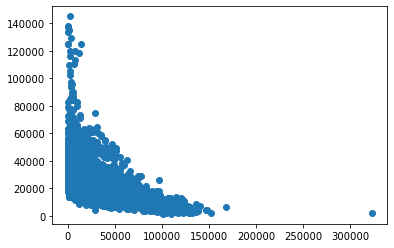

In [458]:
plt.scatter(data['mileage'],data['price'])

In [459]:
data.corr()

,year,mileage,tax,mpg,engineSize,price
year,1.000000,-0.789667,0.093066,-0.351281,-0.031582,0.592581
mileage,-0.789667,1.000000,-0.166547,0.395103,0.070710,-0.535357
tax,0.093066,-0.166547,1.000000,-0.635909,0.393075,0.356157
mpg,-0.351281,0.395103,-0.635909,1.000000,-0.365621,-0.600334
engineSize,-0.031582,0.070710,0.393075,-0.365621,1.000000,0.591262
price,0.592581,-0.535357,0.356157,-0.600334,0.591262,1.000000


In [481]:
year2 =data['year'] * 2
year2.head()
year2 = (year2 - year2.mean()) / year2.std()

m2 = data['mileage'] * 2
nm2 = (m2 - m2.mean()) / m2.std()

en2 = data['engineSize'] * 2
nen2 = (en2 - en2.mean()) / en2.std()

mp2 = data['year'] * 3
nmp2 = (mp2 - mp2.mean()) / mp2.std()

mmp2 = data['engineSize'] * 3
nmmp2 = (mmp2 - mmp2.mean()) / mmp2.std()



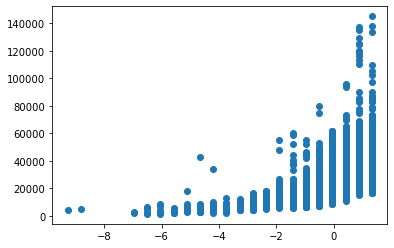

In [482]:
plt.scatter(year2,data['price'])

In [483]:
ndf=(data-data.mean())/data.std()
ndf.head()

,year,mileage,tax,mpg,engineSize,price
0,-0.046448,-0.386817,0.357131,0.357533,-0.880177,-0.887480
1,-0.507810,0.483966,-1.578249,1.037081,0.114919,-0.546033
2,-0.507810,0.217771,-1.429373,0.357533,-0.880177,-1.015522
3,-0.046448,0.047851,0.282693,1.276468,0.114919,-0.520424
4,0.876277,-0.971240,0.282693,-0.090351,-1.543575,-0.477743


In [484]:
ndf.corr()

,year,mileage,tax,mpg,engineSize,price
year,1.000000,-0.789667,0.093066,-0.351281,-0.031582,0.592581
mileage,-0.789667,1.000000,-0.166547,0.395103,0.070710,-0.535357
tax,0.093066,-0.166547,1.000000,-0.635909,0.393075,0.356157
mpg,-0.351281,0.395103,-0.635909,1.000000,-0.365621,-0.600334
engineSize,-0.031582,0.070710,0.393075,-0.365621,1.000000,0.591262
price,0.592581,-0.535357,0.356157,-0.600334,0.591262,1.000000


In [485]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [496]:
X = ndf[['year','mileage','tax','mpg','engineSize']].values
y = ndf[['price']].values

y2 = year2.values.reshape(-1,1)
m2 = nm2.values.reshape(-1,1)
en2 = nen2.values.reshape(-1,1)
mp2 = nmp2.values.reshape(-1,1)
mmp2 = nmmp2.values.reshape(-1,1)
X = np.hstack((X,y2))
X = np.hstack((X,m2))
X = np.hstack((X,en2))
X = np.hstack((X,mp2))
X = np.hstack((X,mmp2))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
print(len(X_train),len(X_test))

7467 3201


In [497]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [498]:
prediction = lr.predict(X_test)

In [499]:
print(prediction)

[[ 0.78278975]
 [ 0.15258316]
 [-0.06478228]
 ...
 [-0.49954451]
 [-0.48458241]
 [ 0.91996463]]


In [500]:
print(y_test)

[[ 0.17868913]
 [ 0.00881915]
 [-0.33262805]
 ...
 [-0.41884347]
 [-0.27663071]
 [ 0.85287664]]


In [501]:
print(lr.score(X_test,y_test))

print(y_train[:1])

0.7642488679733397
[[-0.54620328]]


In [502]:
scores_test = []
scores_train = []
m = []

for i in range(2,len(X_train)):
    x_temp = X_train[:i,:]
    y_temp = y_train[:i,:]
    
    temp_lr = LinearRegression()
    temp_lr.fit(x_temp,y_temp)
    
    scores_test.append(temp_lr.score(X_test,y_test))
    scores_train.append(temp_lr.score(X_train[:i,:],y_train[:i,:]))
    m.append(i)


    
    

In [503]:
print(scores_test[-1])

0.7642486196468229


In [504]:
print(scores_train[-1])

0.7795860950680016


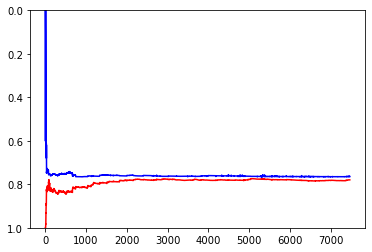

In [505]:
plt.plot(m,scores_train,color = 'r')
plt.plot(m,scores_test,color = 'b')
plt.ylim([1,0])
plt.show()
#learningCurves

In [506]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
k = 5
kf = KFold(n_splits=k, random_state=None)
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X[train_index,:],X[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    lr.fit(X_train,y_train)
    pred_values = lr.predict(X_test)
     
    acc = lr.score(X_test , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8060194038407272, 0.7784247255920624, 0.7155292067030201, 0.6808032185777415, 0.7718271936169488]
Avg accuracy : 0.7505207496660999
